# Analysis of FBI Firearm Background Check Data

Project Cheat Sheet:

https://classroom.udacity.com/nanodegrees/nd025-ent-shell/parts/ff0e5daa-8f0e-419a-a445-53e7f111b59f/modules/aaf8503f-e9ac-404b-b81b-82ca77ce7461/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/e1dfe986-ad5d-4669-b1f9-a89f92af7a50

Grading Criteria:

https://review.udacity.com/#!/rubrics/107/view




# Introduction

Notes on Data source here:

https://github.com/BuzzFeedNews/nics-firearm-background-checks

FBI publishes monthly data that is collected on the number of background checks processed by Federal Firearms Licensed dealers by state.  The big caveats are that not every background check results in a sale, and some checks represent multiple purchases.  There are also differences in how individual states report, and private party sales are not subject to the background check requirement.  However this is considered a rough proxy for the number of new firearm purchases in the United States.

In [1]:
#RUN ONCE
#Pull data from source:
#!git clone https://github.com/BuzzFeedNews/nics-firearm-background-checks.git

In [2]:
#Import Modules and Load Data
import pandas as pd
import os
import matplotlib as plt
import numpy as np
import matplotlib.dates as mdates
%matplotlib inline

print(os.getcwd())
os.chdir(r'D:\EPST\Predictive Maintenance\Udacity\nics-firearm-background-checks\data')

df = pd.read_csv('nics-firearm-background-checks.csv')


D:\EPST\Predictive Maintenance\Udacity


# Data Cleanup

The data are reported monthly, use the date column to index the dataframe.  Create a year column and a calendar month column for filtering later on.

In [3]:
#RUN ONCE
#Convert date column to datetime
df.month = pd.to_datetime(df['month'])

#Set & rename the index
df.index = df['month']
df.index.name = 'date'

#Add columns for year and calendar month
df.insert(1,'year',df.month.dt.year)
df.insert(2,'cal_month',df.month.dt.month)

#Convert State field to categorical
df.state = df.state.astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14080 entries, 2020-02-01 to 1998-11-01
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      14080 non-null  datetime64[ns]
 1   year                       14080 non-null  int64         
 2   cal_month                  14080 non-null  int64         
 3   state                      14080 non-null  category      
 4   permit                     14056 non-null  float64       
 5   permit_recheck             2695 non-null   float64       
 6   handgun                    14060 non-null  float64       
 7   long_gun                   14061 non-null  float64       
 8   other                      7095 non-null   float64       
 9   multiple                   14080 non-null  int64         
 10  admin                      14057 non-null  float64       
 11  prepawn_handgun            12137 non-null  float64

# Exploratory Data Analysis

The totals column has a value for every row - so, no need to delete any rows.  All columns have at least one entry, so no need to delete any columns.

In [4]:
df.sample(50)
df.head()

#There are 50 states + DC, Puerto Rico, Guam, US Virgin Islands, Mariana Islands
#Each state has 256 records => 55 * 256 = 14080 total records.
df['state'].value_counts(ascending=True,sort=False)


Alabama                 256
Alaska                  256
Arizona                 256
Arkansas                256
California              256
Colorado                256
Connecticut             256
Delaware                256
District of Columbia    256
Florida                 256
Georgia                 256
Guam                    256
Hawaii                  256
Idaho                   256
Illinois                256
Indiana                 256
Iowa                    256
Kansas                  256
Kentucky                256
Louisiana               256
Maine                   256
Mariana Islands         256
Maryland                256
Massachusetts           256
Michigan                256
Minnesota               256
Mississippi             256
Missouri                256
Montana                 256
Nebraska                256
Nevada                  256
New Hampshire           256
New Jersey              256
New Mexico              256
New York                256
North Carolina      

In [5]:
#In 2019, which states had the fewest background checks?

df_2019 = df[df['year']==2019].groupby('state').totals.describe();

df_2019.sort_values('mean').head()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Mariana Islands,12.0,15.750000,4.287932,9.0,13.00,16.0,18.00,25.0
Virgin Islands,12.0,128.666667,41.892358,75.0,109.75,118.5,142.25,242.0
Guam,12.0,199.750000,39.277856,150.0,180.25,188.0,211.00,294.0
District of Columbia,12.0,493.833333,190.688625,305.0,372.25,413.0,598.75,933.0
Hawaii,12.0,1055.500000,105.006060,857.0,1011.00,1056.5,1111.00,1212.0


In [6]:
#The most?
df_2019.sort_values('mean',ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Illinois,12.0,412464.166667,93287.048806,190886.0,375305.00,422461.0,479537.25,548192.0
Kentucky,12.0,343407.666667,39754.409593,286064.0,313654.25,330324.0,379803.75,405291.0
Texas,12.0,123934.333333,20824.954045,91183.0,107350.25,121508.5,137097.75,166241.0
Indiana,12.0,120880.416667,80117.780793,61139.0,73754.25,80884.0,119607.00,292587.0
California,12.0,103386.000000,10660.223168,89532.0,96074.00,98824.0,112478.50,123056.0


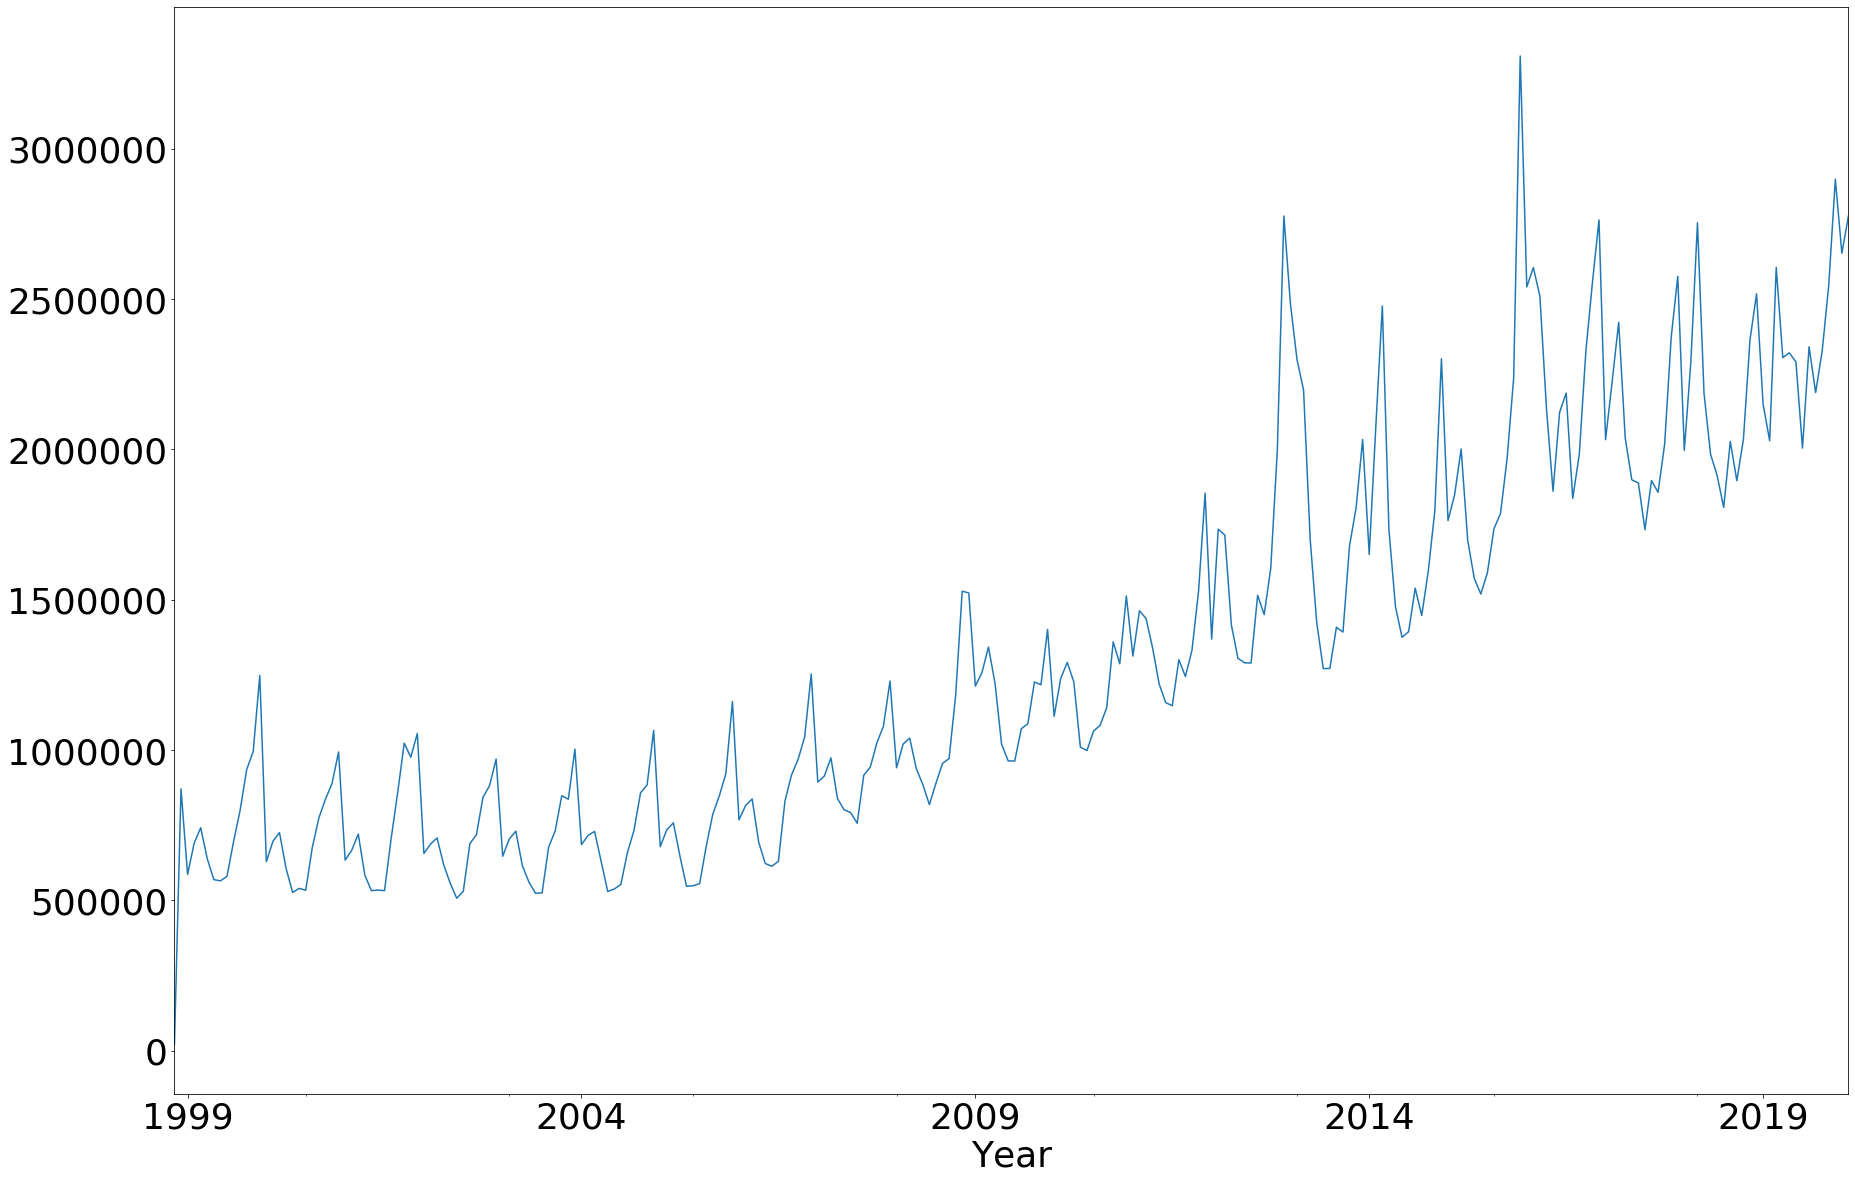

In [16]:
#Reproduce the graph provided on github page.
ax = df.groupby('month').totals.sum().plot(figsize=(30,20),fontsize=36);
ax.set_xlabel("Year",fontsize=36);
#ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 1))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m-%Y'))



In [47]:
#df.query('month==1')
#df.head()

#for each_year in list(df.year.unique()):
    #print(each_year)
    #df_annual = .append(df[df.year==each_year].groupby('month').totals.describe())
    
#df_annual = pd.DataFrame()
df_state = df.groupby(['state','year']).totals.describe();


#df_state[df_state['state']=='Alabama'].head()
    

,,count,mean,std,min,25%,50%,75%,max
state,year,,,,,,,,
Missouri,2000,12.0,15964.833333,4518.960175,10574.0,13201.50,15181.0,18001.75,23599.0
Hawaii,2006,12.0,632.333333,118.190396,464.0,538.75,642.5,698.50,858.0
Georgia,2012,12.0,38796.666667,14675.218247,27206.0,28602.50,34450.5,42265.25,78998.0
Nevada,2006,12.0,6080.250000,892.573819,5132.0,5453.25,5957.0,6290.50,8141.0
Kansas,2011,12.0,13741.500000,3696.952098,9557.0,11189.25,13091.0,15783.75,21656.0
Alaska,2009,12.0,5065.000000,755.600303,4227.0,4593.75,4881.5,5298.75,6724.0
Pennsylvania,1998,2.0,24158.500000,34141.236716,17.0,12087.75,24158.5,36229.25,48300.0
Hawaii,1998,2.0,215.500000,265.165043,28.0,121.75,215.5,309.25,403.0
Minnesota,1998,2.0,6058.000000,8116.171634,319.0,3188.50,6058.0,8927.50,11797.0


In [28]:
df_annual.head()
#df[df.year==2019].groupby('month').totals.sum()

AttributeError: 'list' object has no attribute 'head'

In [10]:
#df.query('year==2019').boxplot(column=('permit','totals'),by='month',figsize=(30,20))

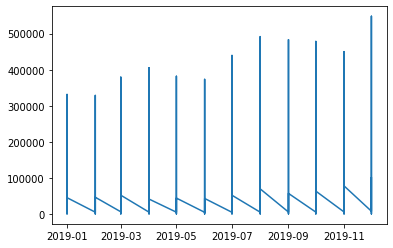

In [11]:
plt.pyplot.plot(df.query('year==2019').index,df.query('year==2019').totals)

# QUESTION
What is the best time of year to shop for good deals on firearms?


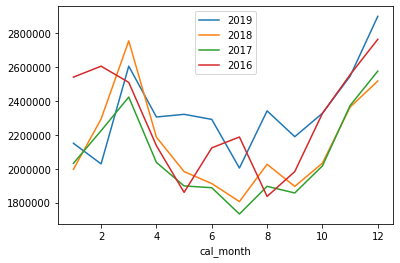

In [21]:
df[df.year==2019].groupby('cal_month').totals.sum().plot()
df[df.year==2018].groupby('cal_month').totals.sum().plot()
df[df.year==2017].groupby('cal_month').totals.sum().plot()
ax = df[df.year==2016].groupby('cal_month').totals.sum().plot()

ax.legend(['2019','2018','2017','2016']);

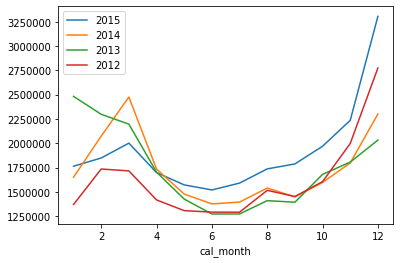

In [23]:
df[df.year==2015].groupby('cal_month').totals.sum().plot()
df[df.year==2014].groupby('cal_month').totals.sum().plot()
df[df.year==2013].groupby('cal_month').totals.sum().plot()
ax = df[df.year==2012].groupby('cal_month').totals.sum().plot()

ax.legend(['2015','2014','2013','2012']);

# ANSWER

If the number of background checks is considered a good indication of consumer demand, the best time to shop would be when consumer demand is low during the summer months.  Avoid purchases in December and March.  Appears June / July 2016 is an anomoly, possibly related to Presidential Election in November, or the Orlando Nightclub shooting on June 12.  Unlikely that the election was causal, because the trend did not continue in August / September.  The spike in August 2019 appears correlated with the El Paso Walmart shooting on Aug. 3rd.